**1. SCRIPT IMPORT PACKAGE DAN LIBRARY**
---



In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

**2. LIBRARY UNTUK VISUALIASASI**
---



In [0]:
from matplotlib import pyplot as plt
import seaborn as sns

**3. Import loan_data.csv**
---



In [0]:
loan_data=pd.read_csv('loan_data.csv')

In [4]:
#tipe dari masing-masing variabel
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#summary dari masing-masing variabel
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
#lima baris pertama dari masing-masing variabel
loan_data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**4. Lakukan pengecekan missing data dan duplicated-row**
---



In [7]:
#checking missing value
loan_data.isnull().sum()[loan_data.isnull().sum() !=0]

Series([], dtype: int64)

In [8]:
#check duplicate row
loan_data["Duplicate"]= loan_data.duplicated()
loan_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Duplicate
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,False
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,False
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False


In [9]:
loan_data['Duplicate'].value_counts() 

False    9578
Name: Duplicate, dtype: int64

In [10]:
loan_data.shape

(9578, 15)

karena pada kolom duplicate jumlah false sama dengan jumlah data maka tidak ada row yang duplicate.

**5. Lakukan pengecekan variabel target.**
---



In [11]:
#Mendefinisikan variabel target sebagai Y
Y=loan_data['not.fully.paid']

##Melakukan pengecekan jumlah dan macam kategori di variabel target
Y.unique()

array([0, 1])

In [12]:
#menghitung jumlah kategori di variabel target
(Y==1).sum(),(Y==0).sum()

(1533, 8045)

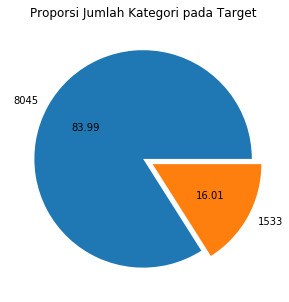

In [13]:
#visualisasi 
Y_count=loan_data['not.fully.paid'].value_counts()

colors = ["#1f77b4", "#ff7f0e"]
explode = (0, 0.1) 
plt.figure(figsize=(5,5)) 
plt.pie(
    Y_count,
    labels=Y_count,
    autopct='%.2f',
    colors=colors,
    explode=explode)
plt.title("Proporsi Jumlah Kategori pada Target")
plt.show()

Jenis kategori yang ada pada target di dataset loan_data hanya ada dua, yakni 0 dan 1 dimana jumlah data yang termasuk kedalam kategori 1 sebanyak 1.533 data dan jumlah data yang termasuk kedalam kategori 0 sebanyak 8.045 data. Terjadi ketimpangan jumlah antara data yang masuk kedalam kategori 0 dan kategori 1 (imbalance).

**6. Variansi (ragam) nilai installment**
---



In [14]:
import statistics 
print("Varians dari nilai installment adalah % s " %(loan_data['installment'].var())) 

Varians dari nilai installment adalah 42878.52390484531 


**7. Nilai simpangan kuartil pada variabel installment**
---



Simpangan kuartil didapat dari perhitungan antara Q3 dikurangi Q1

In [0]:
Q1=loan_data['installment'].quantile(q=0.25)
Q3=loan_data['installment'].quantile(q=0.75)
simpangan=Q3-Q1

In [16]:
print('simpangan kuartil pada variabel installment adalah % s' %(simpangan))

simpangan kuartil pada variabel installment adalah 268.99249999999995


**8. Nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)**
---





In [17]:
install_max=loan_data['installment'].groupby(loan_data['purpose']).max()
install_max=pd.DataFrame(install_max)
install_max

,installment
purpose,
all_other,916.95
credit_card,922.42
debt_consolidation,940.14
educational,861.88
home_improvement,902.06
major_purchase,898.55
small_business,926.83


**9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman**
---

In [18]:
#jumlah kategori pada variabel purpose
loan_data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [19]:
len(loan_data['purpose'].unique())

7

terdapat 7 macam tujuan pengajuan pinjaman yang ada pada variabel purpose sesuai dengan yang telah dijelaskan diatas. diantaranya : <br>
1. Debt Consolidation
2. Credit Card
3. All other
4. Home Improvement
5. Small Business
6. Major Purchase
7. Educational

Untuk mengetahui frekuensi dari masing-masing kategori yang ada pada variabel purpose maka dapat dilihat dengan menggunakan barplot berikut:

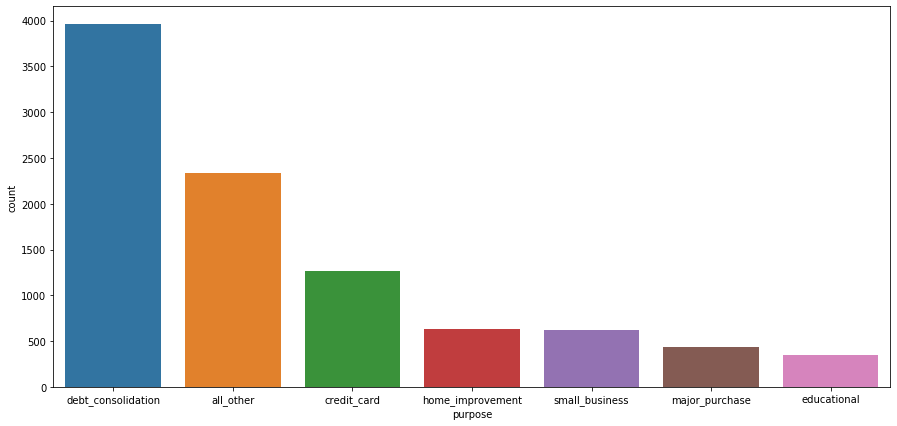

In [36]:
plt.figure(figsize=(15,7)) 
sns.countplot(x = 'purpose',
              data =loan_data,
              order = loan_data['purpose'].value_counts().index)
plt.show()

Barplot dari variabel purpose menunjukkan bahwa tiga tujuan peminjaman tertinggi adalah untuk debt_consolidation, all_other, dan creditcard. Sedangkan paling rendah adalah untuk educational.

**10. variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda,  Visualisasikan distribusi ‘fico’ terhadap target.**
---



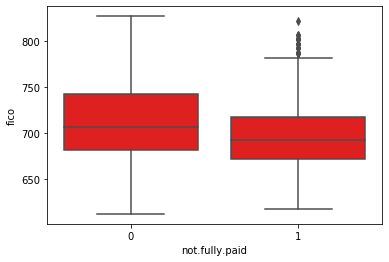

In [78]:
sns.boxplot(y=loan_data['fico'],x=loan_data['not.fully.paid'],color='red')
plt.show()

Dari boxplot antara variabel fico dengan target not.fully.paid diketahui bahwa range fico diantara kedua target yang ada di variabel not.fully.paid tidak jauh berbeda sehingga diketahui bahwa variabel fico tidak memiliki pengaruh yang kuat untuk memprediksi not.fully.paid

**11. Variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.**
---


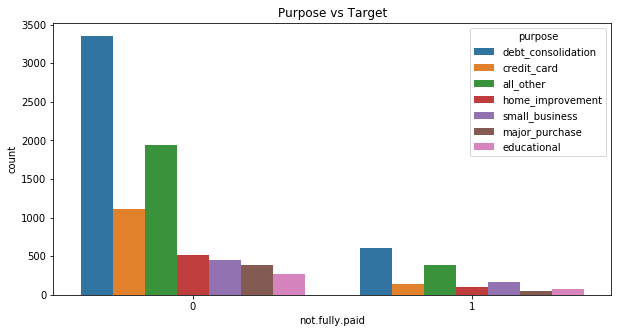

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(loan_data['not.fully.paid'],
              hue=loan_data['purpose'])
plt.title('Purpose vs Target')
plt.show()

Dari barplot diatas diketahui bahwa jumlah antara target 0 dan target 1 memiliki perbedaan yang cukup signifikan dimana target 0 selalu memiliki jumlah lebih banyak jika dibandingkan dengan target 1. Hal tersebut mengakibatkan bahwa purpose tidak memiliki pengaruh besar untuk memprediksi target.

**12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?**
---



In [28]:
loan_data[loan_data.purpose == 'credit_card'][['int.rate']].mean()

int.rate    0.119738
dtype: float64

Nilai rata-rata dari int.rate dengan kategori credit_card pada purpose adalah 0,119738

**13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?**
---



In [46]:
hasil=loan_data[(loan_data.purpose == 'educational')&(loan_data['installment'] > 200)]
print('Jumlah kasus pinjaman yang nilai installmentnya diatas 200 dengan tujuan educational adalah % s' %(len(hasil)))

Jumlah kasus pinjaman yang nilai installmentnya diatas 200 dengan tujuan educational adalah 137


**14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.**
---



In [54]:
loans3=loan_data[loan_data['purpose']=='credit_card']
loans3=pd.DataFrame(loans3)
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Duplicate
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,False
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0,False
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0,False


**15. Siapkan data untuk pemodelan.**
---



In [59]:
#mengubah data kategorik menjadi dummy variabel
final_data=pd.get_dummies(loan_data)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Duplicate,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,False,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,False,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False,0,0,0,0,1,0,0


Pada dataset ini, data kategorik hanya pada variabel purpose sehingga yang akan dirubah menjadi dummies variabel hanyalah purpose

**16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.**
---


In [0]:
#Mendefinisikan variabel X dan Y
Y=final_data['not.fully.paid']
X=final_data.drop(['not.fully.paid'],axis=1)

In [0]:
#Split data dari data X dan data Y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

**17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.**
---



In [0]:
#import library
from sklearn.tree import DecisionTreeClassifier

In [74]:
#Membangun model dengan menggunakan Decision Tree
DTree = DecisionTreeClassifier()
DTree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
#model 
DTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’**
---



In [0]:
prediksi=DTree.predict(X_test)

In [97]:
prediksi

array([0, 1, 0, ..., 0, 0, 0])

Hasil prediksi tersebut dihasilkan berdasarkan model yang telah dibangun sebelumnya menggunakan Decision Tree.

**19. Tampilkan confusion matrix antara hasil prediksi dan target data test.**
---



In [98]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, recall_score,precision_score
print('Confusion Matrix')
CF=confusion_matrix(y_test,prediksi)
print(confusion_matrix(y_test,prediksi))

Confusion Matrix
[[1969  462]
 [ 338  105]]


**20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.**
---



In [99]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



Hasil prediksi target dengan menggunakan model Decision Tree. Nilai F1Score menunjukkan bahwa bobot perbandingan rata-rata presisi dan recall sebesar 0.72. 